In [2]:
import numpy as np
import pandas as pd
import re
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import warnings
warnings.filterwarnings('ignore')

In [3]:
movie_data = load_files(r"C:\Users\ifoa\Desktop\txt_sentoken")
X_, y = movie_data.data, movie_data.target

In [4]:
unique, counts = np.unique(y, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 999]
 [  1 414]]


In [40]:
# patterns = [r"b'",
#             r'b"',
#             r"b\\",
#             r"\\n",
#             r'\\',
#             r'"',
#             r",",
#             r"'",
#             r"\?",
#             r"\!",
#             r'\.',
#             r"\*",
#             r":",
#             r"-",
#             r"[()]",
#             r"\)",
#             r"/",
#             r"[0-9]+"
#             r"[^a-zA-z\s]+",
#             r"[0-9]",
#             r"`"
#             ]

# patterns = [
#             r"b'",
#             r'b"',
#             r"b\\",
#             r"\\n",
#             r"[^a-zA-Z\s]"
#             ]
# patterns = [r"-"]
patterns = [
            r"[\n]",
            r'[^\w\s]', 
            r'[!@#$%<.*?>]+',#Remove simbols Remove HTML tags/markups
            r"[0-9]"
            ] 
rem_spaces = r" +"

X =[]

for doc in X_:
    docx = doc.decode('utf-8')
    for pattern in patterns:
        matches = re.findall(pattern, docx)
        if matches:
            for match in matches:
                docx = docx.replace(match, '')
        space_match = re.findall(rem_spaces, docx)
        for sm in space_match:
            docx = docx.replace(sm, ' ')
    docx = docx.strip()
    X.append(docx)
    

In [41]:
X[0]

'lisa cholodenkos high art is an intelligent quiet drama its strongest quality aside from the topnotch central performances is the perceptive way in which the film also written by cholodenko observes its characters they are all flawed people some more troubled than others but they are not judged judging the characters in this picture would be a creative misstep on the filmmakers parts because no one no matter how bad off they are deserve to be negatively judged if they are involved in some serious problems that they cannot break free of syd radha mitchell a yearold woman living with her longtime boyfriend james gabriel mann has recently been awarded an ideal job at the highprofile photography magazine frame she very much enjoys where her career is headed but is often not taken very seriously by her managers who are always giving her petty jobs to do when she knows she could be doing more important things one night while taking a bath syd notices a leak coming from the apartment above h

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidfconverter = TfidfTransformer()

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [49]:
X_train_vect = vectorizer.fit_transform(X_train).toarray()
X_train = tfidfconverter.fit_transform(X_train_vect).toarray()           # applico la trasformazione TF-IDF
print(X_train.shape, y_train.shape)

(1059, 1500) (1059,)


In [50]:
X_test_vect = vectorizer.transform(X_test).toarray()
X_test = tfidfconverter.transform(X_test_vect).toarray()
print(X_test.shape, y_test.shape)

(354, 1500) (354,)


In [51]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

classifier = MultinomialNB(alpha=.01)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]

print(classification_report(y_test,y_pred))
print(f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       248
           1       0.92      0.23      0.36       106

    accuracy                           0.76       354
   macro avg       0.84      0.61      0.61       354
weighted avg       0.80      0.76      0.71       354

0.6089015151515151


Text(145.72222222222223, 0.5, 'Actual')

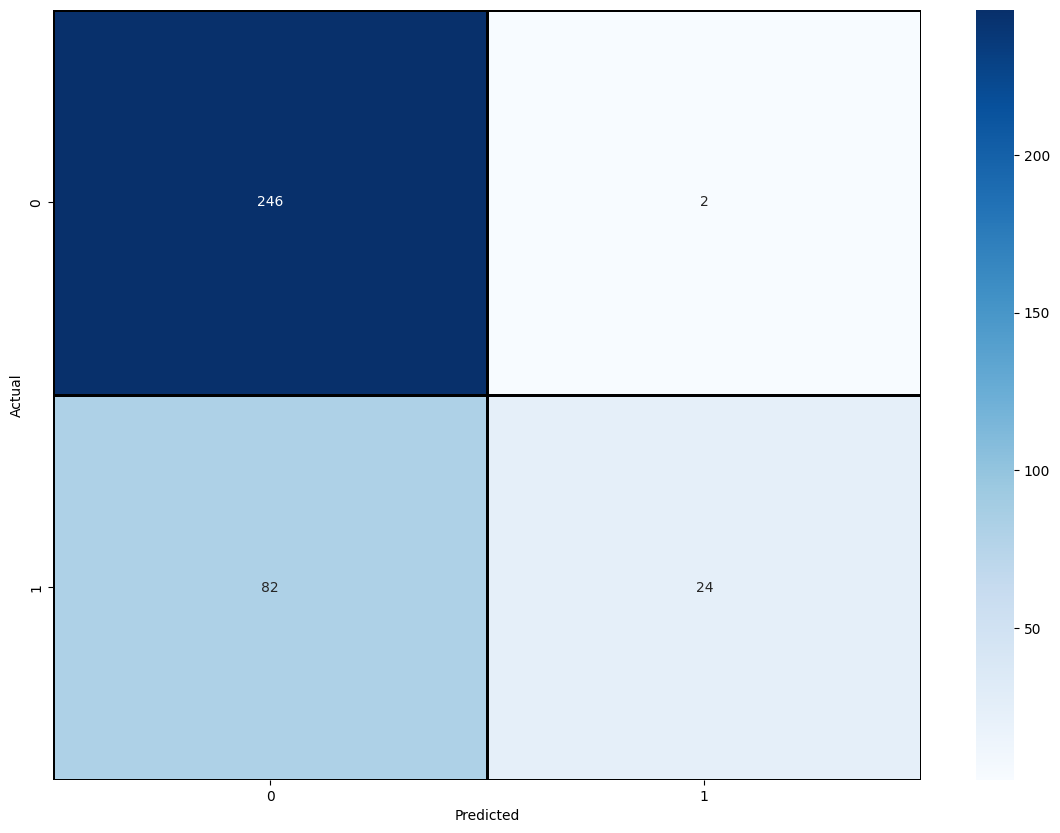

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (14,10))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='')

plt.xlabel("Predicted")
plt.ylabel("Actual")